# **Jack CCC**

1. Yusfian Braman Tio
2. Dwi Prasetya Mumtaz
3. Dhani Syafreal

## **Business Understanding**



UMKM (Usaha Mikro, Kecil, dan Menengah) merupakan pilar utama perekonomian Indonesia, berperan penting dalam penyerapan tenaga kerja, pemerataan ekonomi, dan pengembangan inovasi di berbagai sektor. Namun, UMKM juga menghadapi beragam tantangan, mulai dari keterbatasan akses permodalan, rendahnya literasi digital, variasi kapasitas manajemen, hingga kesenjangan dalam pemanfaatan teknologi. Hal ini menuntut adanya strategi pengembangan UMKM yang lebih adaptif, efektif, dan berbasis data, sehingga intervensi yang dilakukan pemerintah, instansi, maupun lembaga terkait dapat tepat sasaran dan berdampak nyata.

Dalam konteks tersebut, segmentasi UMKM menjadi langkah krusial untuk memahami keragaman karakteristik, kebutuhan, serta potensi yang dimiliki masing-masing kelompok UMKM. Dengan melakukan segmentasi yang tepat, pemerintah dan stakeholder dapat merancang program intervensi yang lebih terarah, seperti penyaluran bantuan keuangan, pelatihan keterampilan, akselerasi digitalisasi, maupun optimalisasi strategi pemasaran yang sesuai dengan kebutuhan nyata di setiap segmen UMKM.

Penelitian ini secara spesifik bertujuan untuk melakukan segmentasi UMKM menggunakan algoritma K-Means clustering yang diintegrasikan dengan kerangka kerja CRISP-DM (Cross-Industry Standard Process for Data Mining). K-Means dipilih karena kemampuannya dalam mengelompokkan data secara objektif berdasarkan kemiripan karakteristik, seperti aset, omset, jumlah tenaga kerja, usia usaha, jenis usaha, kanal pemasaran digital yang digunakan, dan status legalitas. Sementara itu, penerapan tahapan CRISP-DM memastikan seluruh proses analisis, mulai dari pemahaman kebutuhan bisnis hingga interpretasi hasil, berjalan sistematis dan dapat dipertanggungjawabkan.

Hasil dari segmentasi ini diharapkan dapat memberikan insight yang signifikan untuk penyusunan kebijakan dan strategi pengembangan UMKM yang berbasis data. Sebagai contoh, hasil segmentasi dapat membantu instansi pemerintah dalam menentukan klaster UMKM yang membutuhkan intervensi berupa pelatihan digitalisasi, pemberian bantuan modal, atau penguatan akses pasar. Selain itu, segmentasi juga memudahkan monitoring dan evaluasi program secara lebih terukur, sehingga sumber daya yang dimiliki negara atau lembaga dapat dialokasikan secara optimal sesuai kebutuhan riil di lapangan.

Dengan demikian, business understanding dalam penelitian ini tidak hanya berfokus pada upaya identifikasi kelompok UMKM secara statistik, tetapi juga berorientasi pada peningkatan efektivitas kebijakan, pemberdayaan, dan akselerasi digitalisasi UMKM di Indonesia berbasis pemanfaatan data dan teknologi.

## **Data Understanding**

### Menyiapkan library yang dibutuhkan

In [114]:
!pip install pandas
!pip install numpy
!pip install gdown
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from google.colab import drive
from IPython.display import display, HTML
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA


In [116]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id_umkm                 13467 non-null  object
 1   nama_usaha              13564 non-null  object
 2   jenis_usaha             13467 non-null  object
 3   tenaga_kerja_perempuan  13408 non-null  Int64 
 4   tenaga_kerja_laki_laki  13429 non-null  Int64 
 5   aset                    13422 non-null  Int64 
 6   omset                   13423 non-null  Int64 
 7   marketplace             13447 non-null  object
 8   kapasitas_produksi      13400 non-null  Int64 
 9   status_legalitas        13470 non-null  object
 10  tahun_berdiri           13436 non-null  Int64 
 11  laba                    13407 non-null  Int64 
 12  biaya_karyawan          13430 non-null  Int64 
 13  jumlah_pelanggan        13412 non-null  Int64 
dtypes: Int64(9), object(5)
memory usage: 1.6+ MB


<IPython.core.display.HTML object>

,Ringkasan
Total Data,13564
Jenis Usaha Terbanyak,jasa
Jumlah Jenis Usaha,9
Status Legalitas Terdaftar (%),50.84046
Rata-rata Aset,5223369.174639
Median Aset,5211246.5
Min Aset,500233
Max Aset,9999760
Rata-rata Omset,25556075.975192
Median Omset,25611802.0


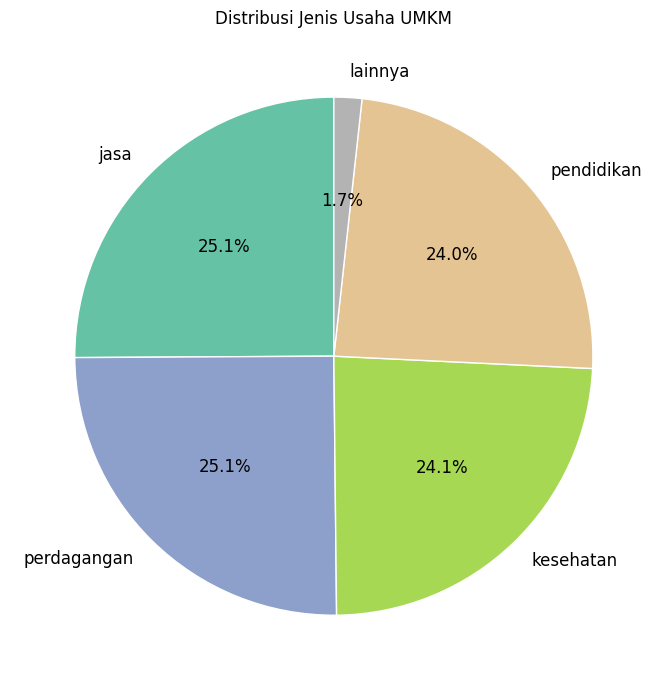

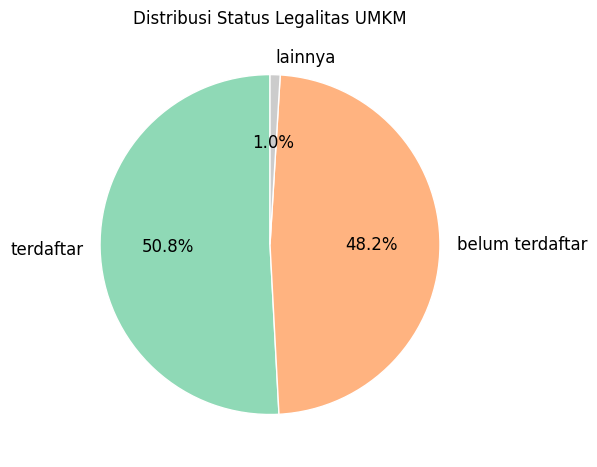

<ipython-input-117-1cb5aa205249>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_marketplace.index, y=top_marketplace.values, palette='viridis')


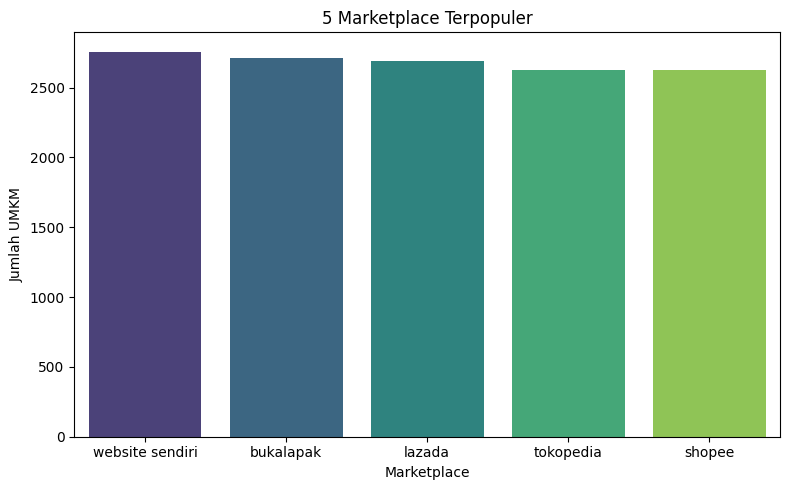

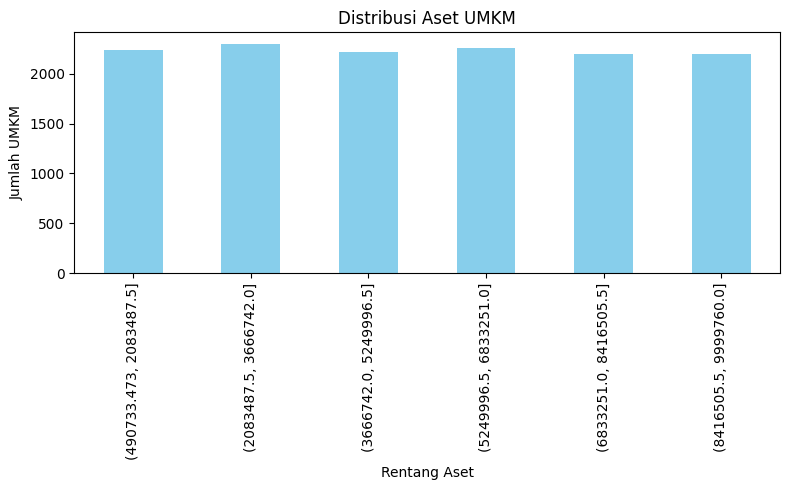

In [117]:
file_path = '/content/drive/MyDrive/disco/dataset.csv'
umkm = pd.read_csv(file_path)

# merubah tipe data fitur dari object menjadi numerik
cols_to_convert = ['tenaga_kerja_perempuan','tenaga_kerja_laki_laki','aset', 'omset','kapasitas_produksi',
                   'tahun_berdiri','laba','biaya_karyawan', 'jumlah_pelanggan' ]

for col in cols_to_convert:
    umkm[col] = pd.to_numeric(umkm[col], errors='coerce').astype('Int64')

display(HTML(umkm.info()))

# Ubah ke lower dan strip (untuk konsistensi string)
umkm['jenis_usaha'] = umkm['jenis_usaha'].astype(str).str.lower().str.strip()
umkm['status_legalitas'] = umkm['status_legalitas'].astype(str).str.lower().str.strip()
umkm['marketplace'] = umkm['marketplace'].astype(str).str.lower().str.strip()

summary = {
    "Total Data": [len(umkm)],
    "Jenis Usaha Terbanyak": [umkm['jenis_usaha'].value_counts().idxmax()],
    "Jumlah Jenis Usaha": [umkm['jenis_usaha'].nunique()],
    "Status Legalitas Terdaftar (%)": [umkm['status_legalitas'].value_counts(normalize=True).get('terdaftar',0)*100],
    "Rata-rata Aset": [umkm['aset'].mean()],
    "Median Aset": [umkm['aset'].median()],
    "Min Aset": [umkm['aset'].min()],
    "Max Aset": [umkm['aset'].max()],
    "Rata-rata Omset": [umkm['omset'].mean()],
    "Median Omset": [umkm['omset'].median()],
    "Min Omset": [umkm['omset'].min()],
    "Max Omset": [umkm['omset'].max()],
    "Rata-rata TK Perempuan": [umkm['tenaga_kerja_perempuan'].mean()],
    "Rata-rata TK Laki-laki": [umkm['tenaga_kerja_laki_laki'].mean()],
    "Marketplace Terpopuler": [umkm['marketplace'].value_counts().idxmax()],
    "Tahun Berdiri Median": [umkm['tahun_berdiri'].median()],
    "Tahun Berdiri Min": [umkm['tahun_berdiri'].min()],
    "Tahun Berdiri Max": [umkm['tahun_berdiri'].max()],
}
summary_df = pd.DataFrame(summary).T
summary_df.columns = ['Ringkasan']
display(summary_df)

threshold = 0.05
jenis_counts = umkm['jenis_usaha'].value_counts(normalize=True)
kategori_besar = jenis_counts[jenis_counts >= threshold].index

# Gabungan minoritas menjadi lainnya
umkm['jenis_usaha_plot'] = umkm['jenis_usaha'].apply(lambda x: x if x in kategori_besar else 'lainnya')

# Plot pie chart yang sudah dirapikan
plt.figure(figsize=(7,7))
umkm['jenis_usaha_plot'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, cmap='Set2',
    wedgeprops={'edgecolor': 'white'}, textprops={'fontsize': 12}
)
plt.title('Distribusi Jenis Usaha UMKM')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Gabungan minoritas menjadi lainnya
umkm['status_legalitas_plot'] = umkm['status_legalitas'].apply(
    lambda x: x if x in ['terdaftar', 'belum terdaftar'] else 'lainnya'
)

# Plot pie chart status legalitas yang sudah bersih
plt.figure(figsize=(6,6))
umkm['status_legalitas_plot'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90,
    colors=['#8fd9b6','#ffb380','#cccccc'],
    wedgeprops={'edgecolor':'white'},
    textprops={'fontsize':12}
)
plt.title('Distribusi Status Legalitas UMKM')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Marketplace Terpopuler
plt.figure(figsize=(8,5))
top_marketplace = umkm['marketplace'].value_counts().head(5)
sns.barplot(x=top_marketplace.index, y=top_marketplace.values, palette='viridis')
plt.title('5 Marketplace Terpopuler')
plt.xlabel('Marketplace')
plt.ylabel('Jumlah UMKM')
plt.tight_layout()
plt.show()

# Distribusi Aset
plt.figure(figsize=(8,5))
bins_aset = pd.cut(umkm['aset'], bins=6)
aset_counts = bins_aset.value_counts().sort_index()
aset_counts.plot(kind='bar', color='skyblue')
plt.title('Distribusi Aset UMKM')
plt.xlabel('Rentang Aset')
plt.ylabel('Jumlah UMKM')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/pandas/core/arrays/masked.py:672: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs2, **kwargs)


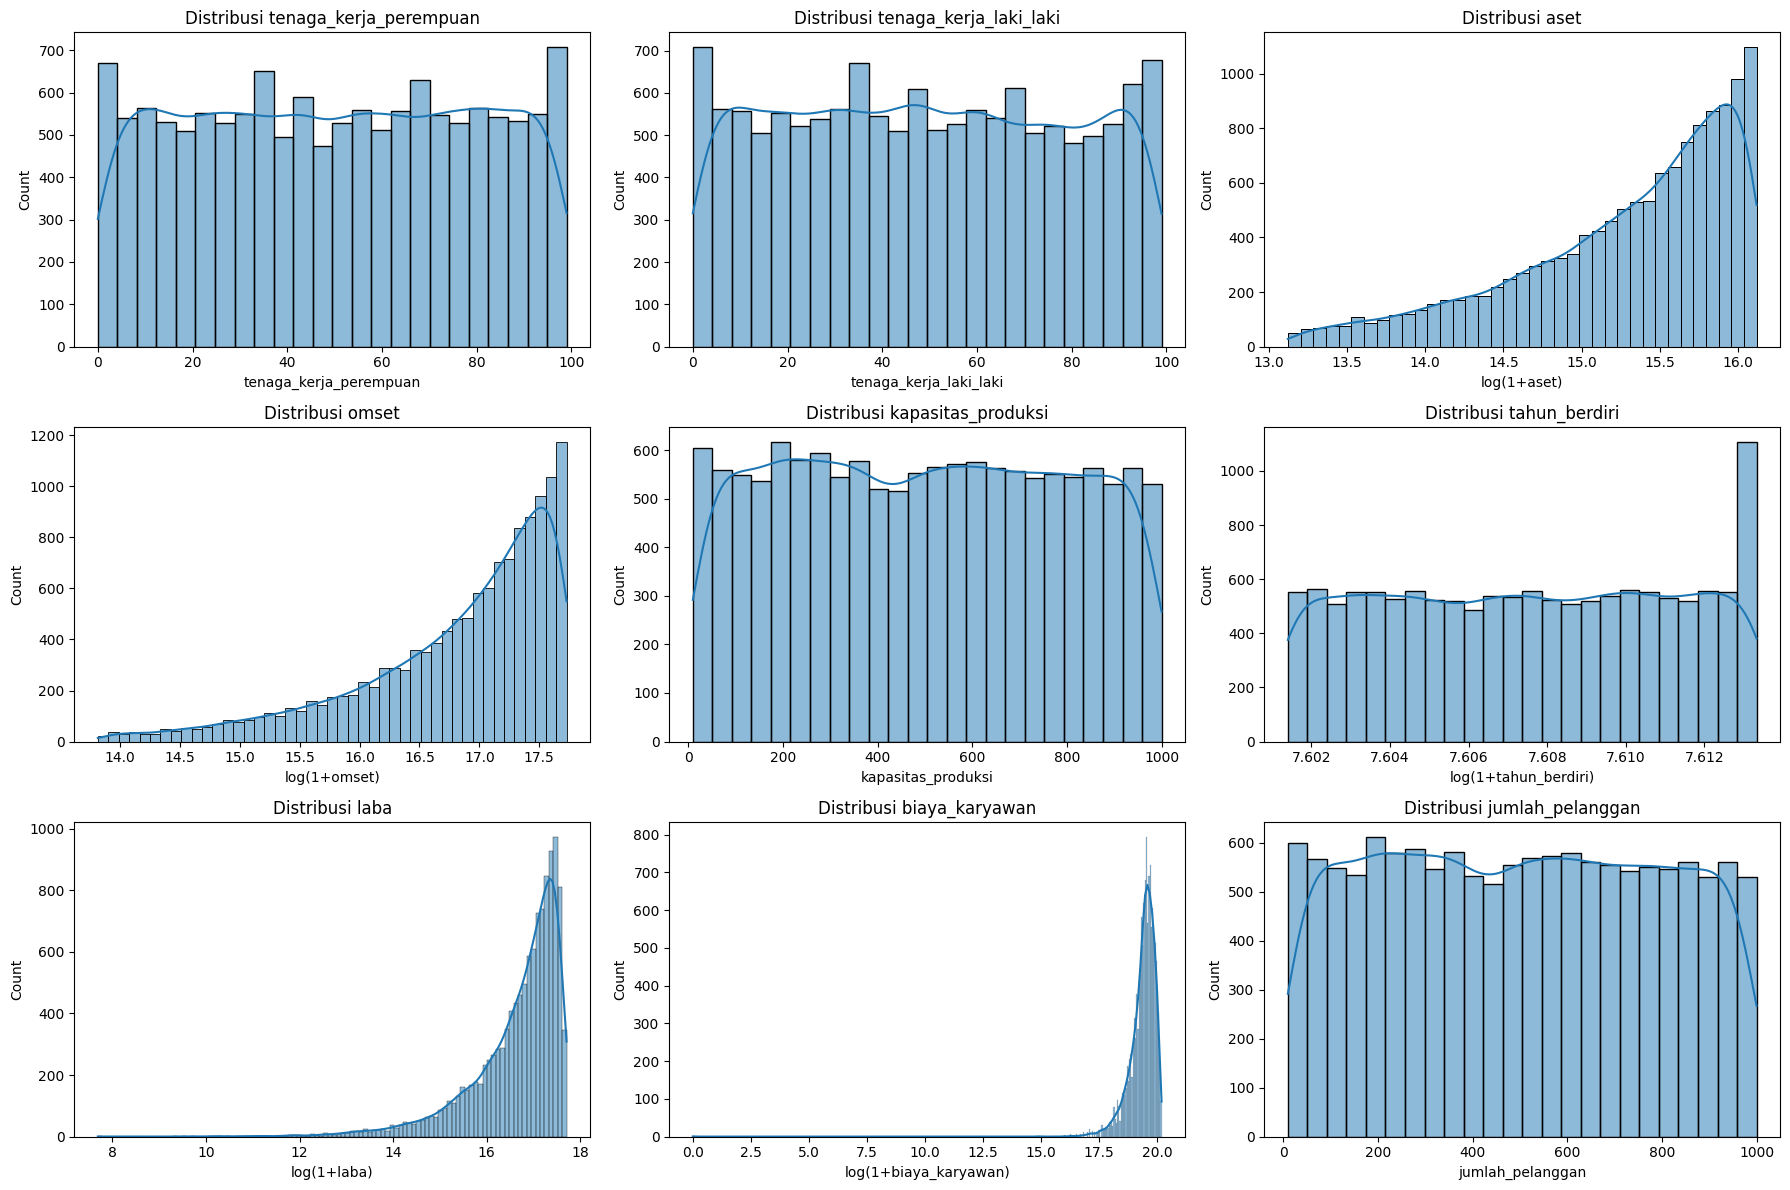

In [118]:
numerical_cols = [
    'tenaga_kerja_perempuan', 'tenaga_kerja_laki_laki', 'aset', 'omset',
    'kapasitas_produksi', 'tahun_berdiri', 'laba', 'biaya_karyawan',
    'jumlah_pelanggan'
]

# Plot distribusi setiap fitur numerik
n_cols = 3
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

plt.figure(figsize=(6 * n_cols, 4 * n_rows))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    data = pd.to_numeric(umkm[col], errors='coerce').dropna()
    if data.max() > 1000:
        sns.histplot(np.log1p(data), kde=True)
        plt.xlabel(f'log(1+{col})')
    else:
        sns.histplot(data, kde=True)
        plt.xlabel(col)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

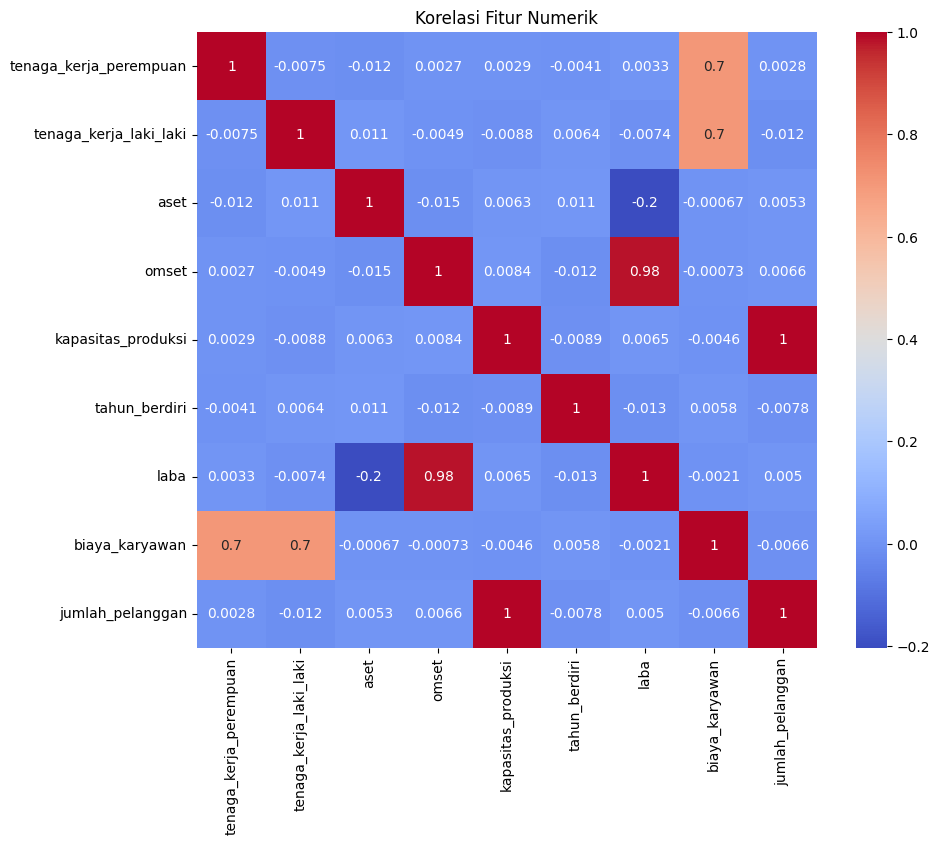

In [119]:
# Korelasi antar fitur numerik
plt.figure(figsize=(10,8))
sns.heatmap(umkm.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur Numerik')
plt.show()

In [120]:
cols = umkm.columns
for col in cols:
    missing_count = umkm[col].isnull().sum()  # NaN atau kosong
    unknown_count = (umkm[col].astype(str).str.lower().str.strip() == 'unknown').sum()  # unknown (tidak case sensitive)
    empty_count = (umkm[col].astype(str).str.strip() == '').sum()  # string kosong
    print(f"{col}: NaN/kosong={missing_count}, 'unknown'={unknown_count}, empty string={empty_count}")

id_umkm: NaN/kosong=97, 'unknown'=29, empty string=0
nama_usaha: NaN/kosong=0, 'unknown'=0, empty string=0
jenis_usaha: NaN/kosong=0, 'unknown'=34, empty string=0
tenaga_kerja_perempuan: NaN/kosong=156, 'unknown'=0, empty string=0
tenaga_kerja_laki_laki: NaN/kosong=135, 'unknown'=0, empty string=0
aset: NaN/kosong=142, 'unknown'=0, empty string=0
omset: NaN/kosong=141, 'unknown'=0, empty string=0
marketplace: NaN/kosong=0, 'unknown'=36, empty string=0
kapasitas_produksi: NaN/kosong=164, 'unknown'=0, empty string=0
status_legalitas: NaN/kosong=0, 'unknown'=36, empty string=0
tahun_berdiri: NaN/kosong=128, 'unknown'=0, empty string=0
laba: NaN/kosong=157, 'unknown'=0, empty string=0
biaya_karyawan: NaN/kosong=134, 'unknown'=0, empty string=0
jumlah_pelanggan: NaN/kosong=152, 'unknown'=0, empty string=0
jenis_usaha_plot: NaN/kosong=0, 'unknown'=0, empty string=0
status_legalitas_plot: NaN/kosong=0, 'unknown'=0, empty string=0


## **Data Preparation**

### Data Cleaning

In [121]:
for col in ['jenis_usaha', 'marketplace', 'status_legalitas']:
    umkm[col] = umkm[col].astype(str).str.lower().str.strip()

# Replace 'unknown' dan 'nan'
umkm = umkm.replace({'unknown': np.nan, 'nan': np.nan})

cols_to_convert = [
    'tenaga_kerja_perempuan', 'tenaga_kerja_laki_laki', 'aset', 'omset',
    'kapasitas_produksi', 'tahun_berdiri', 'laba', 'biaya_karyawan', 'jumlah_pelanggan'
]
for col in cols_to_convert:
    umkm[col] = pd.to_numeric(umkm[col], errors='coerce')


print("\n== Audit Data Setelah Cleaning ==")
for col in cols:
    missing_count = umkm[col].isnull().sum()
    print(f"{col}: NaN/kosong={missing_count}")

# Drop missing value
kolom_penting = [
    'id_umkm', 'jenis_usaha', 'tenaga_kerja_perempuan', 'tenaga_kerja_laki_laki',
    'aset', 'omset', 'marketplace', 'kapasitas_produksi', 'status_legalitas',
    'tahun_berdiri', 'laba', 'biaya_karyawan', 'jumlah_pelanggan'
]
umkm_clean = umkm.dropna(subset=kolom_penting).reset_index(drop=True)

# Hapus outlier pada kolom numerik
for col in cols_to_convert:
    Q1 = umkm_clean[col].astype(float).quantile(0.25)
    Q3 = umkm_clean[col].astype(float).quantile(0.75)
    IQR = Q3 - Q1
    outlier_mask = (umkm_clean[col].astype(float) < Q1 - 1.5*IQR) | (umkm_clean[col].astype(float) > Q3 + 1.5*IQR)
    umkm_clean = umkm_clean[~outlier_mask].reset_index(drop=True)


== Audit Data Setelah Cleaning ==
id_umkm: NaN/kosong=126
nama_usaha: NaN/kosong=0
jenis_usaha: NaN/kosong=131
tenaga_kerja_perempuan: NaN/kosong=156
tenaga_kerja_laki_laki: NaN/kosong=135
aset: NaN/kosong=142
omset: NaN/kosong=141
marketplace: NaN/kosong=153
kapasitas_produksi: NaN/kosong=164
status_legalitas: NaN/kosong=130
tahun_berdiri: NaN/kosong=128
laba: NaN/kosong=157
biaya_karyawan: NaN/kosong=134
jumlah_pelanggan: NaN/kosong=152
jenis_usaha_plot: NaN/kosong=0
status_legalitas_plot: NaN/kosong=0


### Data Description


== Data Description Setelah Preparation ==


,Ringkasan (Setelah Preparation)
Total Data,11753
Jumlah Jenis Usaha,7
Rata-rata Aset,5229678.681613
Median Aset,5217634.0
Rata-rata Omset,25614166.665107
Median Omset,25680958.0
Rata-rata TK Perempuan,49.651748
Rata-rata TK Laki-laki,49.14022
Marketplace Terpopuler,website sendiri
Tahun Berdiri Median,2012.0


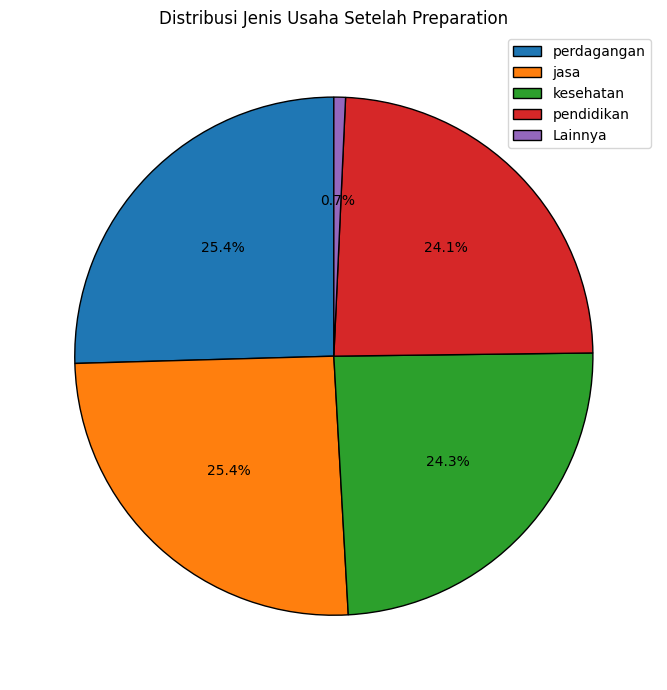

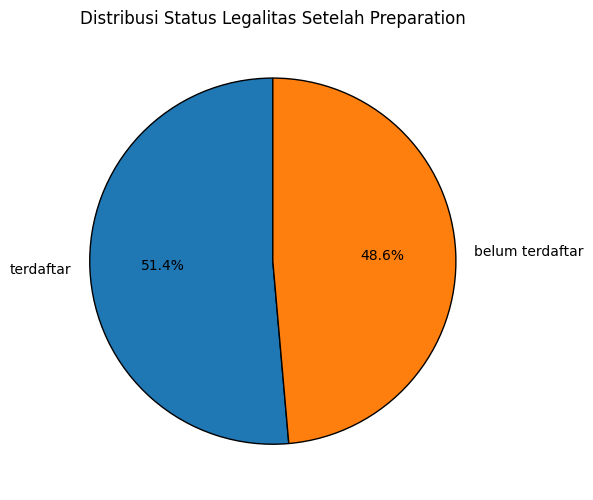

<ipython-input-122-4e44f079726f>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_marketplace.index, y=top_marketplace.values, palette='viridis')


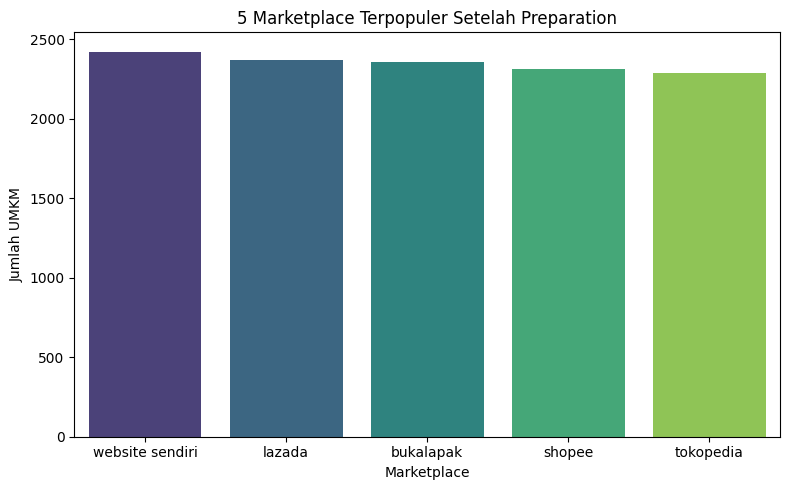

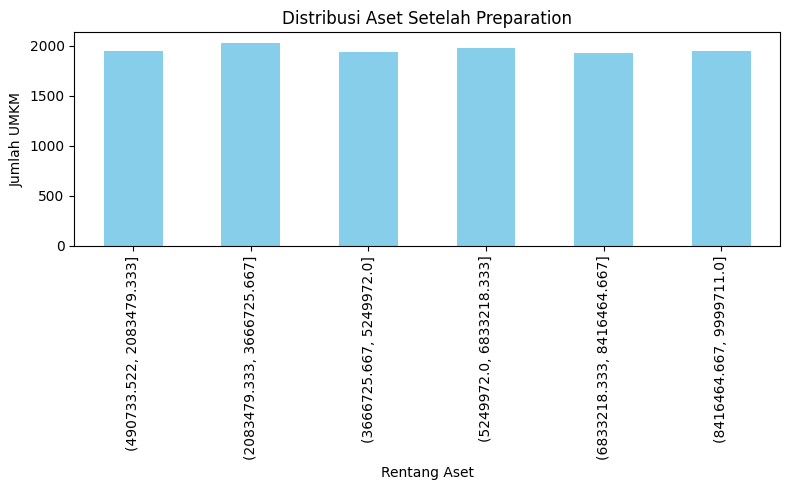

In [122]:
print("\n== Data Description Setelah Preparation ==")
summary = {
    "Total Data": [len(umkm_clean)],
    "Jumlah Jenis Usaha": [umkm_clean['jenis_usaha'].nunique()],
    "Rata-rata Aset": [umkm_clean['aset'].mean()],
    "Median Aset": [umkm_clean['aset'].median()],
    "Rata-rata Omset": [umkm_clean['omset'].mean()],
    "Median Omset": [umkm_clean['omset'].median()],
    "Rata-rata TK Perempuan": [umkm_clean['tenaga_kerja_perempuan'].mean()],
    "Rata-rata TK Laki-laki": [umkm_clean['tenaga_kerja_laki_laki'].mean()],
    "Marketplace Terpopuler": [umkm_clean['marketplace'].value_counts().idxmax()],
    "Tahun Berdiri Median": [umkm_clean['tahun_berdiri'].median()]
}
summary_df = pd.DataFrame(summary).T
summary_df.columns = ['Ringkasan (Setelah Preparation)']
display(summary_df)


def plot_pie_kategori_ringkas(series, threshold=0.05, title=''):
    """
    Menampilkan pie chart dengan kategori kecil (<threshold) digabung ke 'Lainnya'.
    """
    counts = series.value_counts()
    percent = counts / counts.sum()
    small_cats = percent[percent < threshold].index
    series_plot = series.apply(lambda x: 'Lainnya' if x in small_cats else x)
    plot_counts = series_plot.value_counts()

    plt.figure(figsize=(7,7))
    wedges, texts, autotexts = plt.pie(
        plot_counts,
        labels=None,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'edgecolor': 'k'}
    )
    plt.title(title)
    plt.legend(plot_counts.index, loc="best")
    plt.tight_layout()
    plt.show()

plot_pie_kategori_ringkas(
    umkm_clean['jenis_usaha'],
    threshold=0.05,
    title="Distribusi Jenis Usaha Setelah Preparation"
)

plt.figure(figsize=(6,6))
umkm_clean['status_legalitas'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'k'}
)
plt.title('Distribusi Status Legalitas Setelah Preparation')
plt.ylabel('')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
top_marketplace = umkm_clean['marketplace'].value_counts().head(5)
sns.barplot(x=top_marketplace.index, y=top_marketplace.values, palette='viridis')
plt.title('5 Marketplace Terpopuler Setelah Preparation')
plt.xlabel('Marketplace')
plt.ylabel('Jumlah UMKM')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
bins_aset = pd.cut(umkm_clean['aset'], bins=6)
aset_counts = bins_aset.value_counts().sort_index()
aset_counts.plot(kind='bar', color='skyblue')
plt.title('Distribusi Aset Setelah Preparation')
plt.xlabel('Rentang Aset')
plt.ylabel('Jumlah UMKM')
plt.tight_layout()
plt.show()

In [123]:
# Jumlah data setelah cleaning
print(f"Jumlah data setelah cleaning: {len(umkm_clean)}")

# Info missing value setelah cleaning
print("\nJumlah missing value per kolom setelah cleaning:")
missing_per_col = umkm_clean.isnull().sum()
print(missing_per_col)

numeric_cols = umkm_clean.select_dtypes(include=[np.number]).columns
outlier_info = {}
for col in numeric_cols:
    Q1 = umkm_clean[col].quantile(0.25)
    Q3 = umkm_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((umkm_clean[col] < lower) | (umkm_clean[col] > upper)).sum()
    outlier_info[col] = outliers

print("\nJumlah data outlier per kolom numerik (IQR):")
for col, n in outlier_info.items():
    print(f"{col}: {n}")

Jumlah data setelah cleaning: 11753

Jumlah missing value per kolom setelah cleaning:
id_umkm                   0
nama_usaha                0
jenis_usaha               0
tenaga_kerja_perempuan    0
tenaga_kerja_laki_laki    0
aset                      0
omset                     0
marketplace               0
kapasitas_produksi        0
status_legalitas          0
tahun_berdiri             0
laba                      0
biaya_karyawan            0
jumlah_pelanggan          0
jenis_usaha_plot          0
status_legalitas_plot     0
dtype: int64

Jumlah data outlier per kolom numerik (IQR):
tenaga_kerja_perempuan: 0
tenaga_kerja_laki_laki: 0
aset: 0
omset: 0
kapasitas_produksi: 0
tahun_berdiri: 0
laba: 0
biaya_karyawan: 0
jumlah_pelanggan: 0


### Data Transformation

In [124]:
umkm_clean['jenis_usaha'] = umkm_clean['jenis_usaha'].str.lower().str.strip()
umkm_clean['marketplace'] = umkm_clean['marketplace'].str.lower().str.strip()
umkm_clean['status_legalitas'] = umkm_clean['status_legalitas'].str.lower().str.strip()

jenis_usaha_map = {
    'fashion': 0,
    'jasa': 1,
    'kesehatan': 2,
    'makanan & minuman': 3,
    'pendidikan': 4,
    'perdagangan': 5,
    'perusahaan': 6
}
marketplace_map = {
    'bukalapak': 0,
    'lazada': 1,
    'shopee': 2,
    'tokopedia': 3,
    'website sendiri': 4
}
status_legalitas_map = {
    'belum terdaftar': 0,
    'terdaftar': 1
}

# Label encoding manual
umkm_clean['jenis_usaha_encoded'] = umkm_clean['jenis_usaha'].map(jenis_usaha_map)
umkm_clean['marketplace_encoded'] = umkm_clean['marketplace'].map(marketplace_map)
umkm_clean['status_legalitas_encoded'] = umkm_clean['status_legalitas'].map(status_legalitas_map)


def show_html_table(df, title):
    display(HTML(f"<h4>{title}</h4>"))
    display(HTML(df.to_html(index=False)))

# Jenis Usaha
df_jenis = umkm_clean[['jenis_usaha', 'jenis_usaha_encoded']].drop_duplicates().sort_values('jenis_usaha_encoded').reset_index(drop=True)
show_html_table(df_jenis, "Mapping Jenis Usaha")

# Marketplace
df_market = umkm_clean[['marketplace', 'marketplace_encoded']].drop_duplicates().sort_values('marketplace_encoded').reset_index(drop=True)
show_html_table(df_market, "Mapping Marketplace")

# Status Legalitas
df_legal = umkm_clean[['status_legalitas', 'status_legalitas_encoded']].drop_duplicates().sort_values('status_legalitas_encoded').reset_index(drop=True)
show_html_table(df_legal, "Mapping Status Legalitas")


umkm_final = umkm_clean.drop(['jenis_usaha', 'marketplace', 'status_legalitas'], axis=1)
umkm_final = umkm_final.rename(columns={
    'jenis_usaha_encoded': 'jenis_usaha',
    'marketplace_encoded': 'marketplace',
    'status_legalitas_encoded': 'status_legalitas'
})

jenis_usaha,jenis_usaha_encoded
fashion,0
jasa,1
kesehatan,2
makanan & minuman,3
pendidikan,4
perdagangan,5
perusahaan,6


marketplace,marketplace_encoded
bukalapak,0
lazada,1
shopee,2
tokopedia,3
website sendiri,4


status_legalitas,status_legalitas_encoded
belum terdaftar,0
terdaftar,1


### Normalisasi

In [125]:
# Fitur yang dipakai
fitur_clustering = [
    'tenaga_kerja_perempuan', 'tenaga_kerja_laki_laki', 'aset', 'omset',
    'kapasitas_produksi', 'tahun_berdiri', 'laba', 'biaya_karyawan',
    'jumlah_pelanggan', 'jenis_usaha', 'marketplace',
]

# Normalisasi
scaler = MinMaxScaler()
umkm_final[fitur_clustering] = scaler.fit_transform(umkm_final[fitur_clustering])

display(umkm_final.head())

,id_umkm,nama_usaha,tenaga_kerja_perempuan,tenaga_kerja_laki_laki,aset,omset,kapasitas_produksi,tahun_berdiri,laba,biaya_karyawan,jumlah_pelanggan,jenis_usaha_plot,status_legalitas_plot,jenis_usaha,marketplace,status_legalitas
0,28828567,UD. Alif Pamungkas,0.010101,0.565657,0.526020,0.047905,0.474216,0.625000,0.115260,0.287879,0.474216,kesehatan,belum terdaftar,0.333333,0.75,0
1,28828568,UD. Zidanar Panji,0.050505,0.444444,0.726161,0.795302,0.459050,0.583333,0.713498,0.247475,0.459050,perdagangan,terdaftar,0.833333,0.00,1
2,28828570,UD. Damaris Satria,0.898990,0.050505,0.955415,0.402045,0.986855,0.125000,0.343964,0.474747,0.986855,jasa,belum terdaftar,0.166667,1.00,0
3,28828571,UD. Qasya Wiratama,0.919192,0.595960,0.942854,0.077967,0.307381,0.083333,0.072414,0.757576,0.307381,jasa,belum terdaftar,0.166667,0.25,0
4,28828572,UD. Grego Wiraatmaja Nara,0.767677,0.363636,0.902353,0.373410,0.658241,0.000000,0.328474,0.565657,0.658241,jasa,belum terdaftar,0.166667,0.00,0


## **Modeling**

### Elbow method & silhouette score

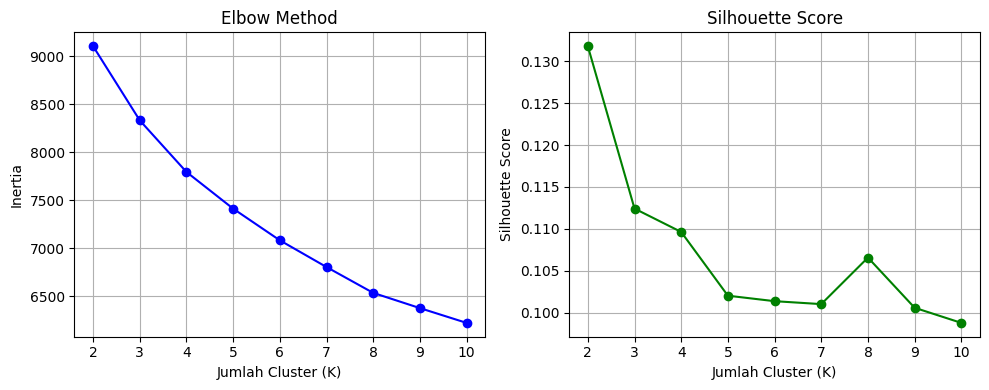

In [126]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
X = umkm_final[fitur_clustering]

# Elbow Method & Silhouette Score untuk pilih K terbaik
inertia = []
silhouette_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    inertia.append(kmeans.inertia_)
    sil_score = silhouette_score(X, labels)
    silhouette_scores.append(sil_score)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(K_range, silhouette_scores, 'go-')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()

In [127]:
inertia_df = pd.DataFrame({
    'Jumlah Cluster (K)': list(K_range),
    'Inertia': inertia
})
display(inertia_df)

,Jumlah Cluster (K),Inertia
0,2,9102.800924
1,3,8330.181880
2,4,7792.953537
3,5,7410.970500
4,6,7081.262787
5,7,6803.016908
6,8,6533.988631
7,9,6375.454723
8,10,6221.556800


In [128]:
# Pilih K=3 (berdasarkan elbow/silhouette)
K_optimal = 3
kmeans_final = KMeans(n_clusters=K_optimal, random_state=42, n_init=10)
umkm_final['cluster'] = kmeans_final.fit_predict(X)

display(umkm_final.head())

,id_umkm,nama_usaha,tenaga_kerja_perempuan,tenaga_kerja_laki_laki,aset,omset,kapasitas_produksi,tahun_berdiri,laba,biaya_karyawan,jumlah_pelanggan,jenis_usaha_plot,status_legalitas_plot,jenis_usaha,marketplace,status_legalitas,cluster
0,28828567,UD. Alif Pamungkas,0.010101,0.565657,0.526020,0.047905,0.474216,0.625000,0.115260,0.287879,0.474216,kesehatan,belum terdaftar,0.333333,0.75,0,0
1,28828568,UD. Zidanar Panji,0.050505,0.444444,0.726161,0.795302,0.459050,0.583333,0.713498,0.247475,0.459050,perdagangan,terdaftar,0.833333,0.00,1,2
2,28828570,UD. Damaris Satria,0.898990,0.050505,0.955415,0.402045,0.986855,0.125000,0.343964,0.474747,0.986855,jasa,belum terdaftar,0.166667,1.00,0,1
3,28828571,UD. Qasya Wiratama,0.919192,0.595960,0.942854,0.077967,0.307381,0.083333,0.072414,0.757576,0.307381,jasa,belum terdaftar,0.166667,0.25,0,0
4,28828572,UD. Grego Wiraatmaja Nara,0.767677,0.363636,0.902353,0.373410,0.658241,0.000000,0.328474,0.565657,0.658241,jasa,belum terdaftar,0.166667,0.00,0,1


In [129]:
display(HTML(umkm_final.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11753 entries, 0 to 11752
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_umkm                 11753 non-null  object 
 1   nama_usaha              11753 non-null  object 
 2   tenaga_kerja_perempuan  11753 non-null  float64
 3   tenaga_kerja_laki_laki  11753 non-null  float64
 4   aset                    11753 non-null  float64
 5   omset                   11753 non-null  float64
 6   kapasitas_produksi      11753 non-null  float64
 7   tahun_berdiri           11753 non-null  float64
 8   laba                    11753 non-null  float64
 9   biaya_karyawan          11753 non-null  float64
 10  jumlah_pelanggan        11753 non-null  float64
 11  jenis_usaha_plot        11753 non-null  object 
 12  status_legalitas_plot   11753 non-null  object 
 13  jenis_usaha             11753 non-null  float64
 14  marketplace             11753 non-null

<IPython.core.display.HTML object>

### Deskripsi Cluster

In [130]:
jenis_usaha_map = {
    'fashion': 0,
    'jasa': 1,
    'kesehatan': 2,
    'makanan & minuman': 3,
    'pendidikan': 4,
    'perdagangan': 5,
    'perusahaan': 6
}
marketplace_map = {
    'bukalapak': 0,
    'lazada': 1,
    'shopee': 2,
    'tokopedia': 3,
    'website sendiri': 4
}
status_legalitas_map = {
    'belum terdaftar': 0,
    'terdaftar': 1
}

# Reverse mapping (kode ke nama kategori)
jenis_usaha_rev = {v: k for k, v in jenis_usaha_map.items()}
marketplace_rev = {v: k for k, v in marketplace_map.items()}
status_legalitas_rev = {v: k for k, v in status_legalitas_map.items()}

fitur_desc_numerik = [
    'aset', 'omset', 'laba', 'jumlah_pelanggan',
    'tenaga_kerja_perempuan', 'tenaga_kerja_laki_laki',
    'kapasitas_produksi', 'tahun_berdiri'
]

def get_kategori_label_from_normalized(x_scaled, min_val, max_val, rev_map):
    """
    Mengubah nilai hasil normalisasi (float 0-1) ke kode integer kategori,
    lalu mapping ke label aslinya.
    """
    kode_int = round(x_scaled * (max_val - min_val) + min_val)
    return rev_map.get(kode_int, f"Kode {kode_int}")

def narasi_cluster_mapping_only(cluster_data, cluster_idx, umkm_final):
    mean_vals = cluster_data[fitur_desc_numerik].mean()
    highlight = []

    # Aset
    if mean_vals['aset'] > umkm_final['aset'].mean():
        highlight.append("aset relatif besar")
    else:
        highlight.append("aset relatif kecil")

    # Omset
    if mean_vals['omset'] > umkm_final['omset'].mean():
        highlight.append("omset relatif besar")
    else:
        highlight.append("omset relatif kecil")

    # Tenaga kerja
    total_tk = mean_vals['tenaga_kerja_perempuan'] + mean_vals['tenaga_kerja_laki_laki']
    avg_tk = umkm_final['tenaga_kerja_perempuan'].mean() + umkm_final['tenaga_kerja_laki_laki'].mean()
    if total_tk > avg_tk:
        highlight.append("memiliki banyak tenaga kerja")
    else:
        highlight.append("tenaga kerja sedikit")

    # Umur usaha
    if mean_vals['tahun_berdiri'] < umkm_final['tahun_berdiri'].mean():
        highlight.append("sebagian besar UMKM sudah lama berdiri")
    else:
        highlight.append("didominasi UMKM baru")

    # Fitur kategorikal hasil normalisasi
    jenis_usaha_min = min(jenis_usaha_map.values())
    jenis_usaha_max = max(jenis_usaha_map.values())
    marketplace_min = min(marketplace_map.values())
    marketplace_max = max(marketplace_map.values())

    # Jenis usaha (inverse dari normalisasi, baru reverse mapping)
    x_scaled_jenis = float(cluster_data['jenis_usaha'].mode().iloc[0])
    jenis_label = get_kategori_label_from_normalized(x_scaled_jenis, jenis_usaha_min, jenis_usaha_max, jenis_usaha_rev)
    highlight.append(f"jenis usaha utama '{jenis_label}'")

    # Marketplace
    x_scaled_marketplace = float(cluster_data['marketplace'].mode().iloc[0])
    marketplace_label = get_kategori_label_from_normalized(x_scaled_marketplace, marketplace_min, marketplace_max, marketplace_rev)
    highlight.append(f"marketplace utama '{marketplace_label}'")

    # Status legalitas (asumsi: tidak dinormalisasi/masih 0 atau 1)
    kode_legal = round(float(cluster_data['status_legalitas'].mode().iloc[0]), 6)
    legal_label = status_legalitas_rev.get(kode_legal, f"Kode {kode_legal}")
    highlight.append(f"status legalitas didominasi '{legal_label}'")

    # Output narasi ringkas mapping
    print(f"\nCluster {cluster_idx}")
    print(f"Karakteristik utama: {', '.join(highlight)}.")

print("==== PROFIL SEGMENTASI UMKM BERDASARKAN MAPPING ====\n")
for cl in sorted(umkm_final['cluster'].unique()):
    cluster_data = umkm_final[umkm_final['cluster'] == cl]
    narasi_cluster_mapping_only(cluster_data, cl, umkm_final)

==== PROFIL SEGMENTASI UMKM BERDASARKAN MAPPING ====


Cluster 0
Karakteristik utama: aset relatif besar, omset relatif kecil, tenaga kerja sedikit, didominasi UMKM baru, jenis usaha utama 'perdagangan', marketplace utama 'lazada', status legalitas didominasi 'terdaftar'.

Cluster 1
Karakteristik utama: aset relatif kecil, omset relatif besar, tenaga kerja sedikit, sebagian besar UMKM sudah lama berdiri, jenis usaha utama 'perdagangan', marketplace utama 'website sendiri', status legalitas didominasi 'terdaftar'.

Cluster 2
Karakteristik utama: aset relatif kecil, omset relatif besar, memiliki banyak tenaga kerja, sebagian besar UMKM sudah lama berdiri, jenis usaha utama 'jasa', marketplace utama 'bukalapak', status legalitas didominasi 'terdaftar'.


### Data Distribusi

<ipython-input-131-4b3f169e8922>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='cluster', data=umkm_final, palette="viridis")


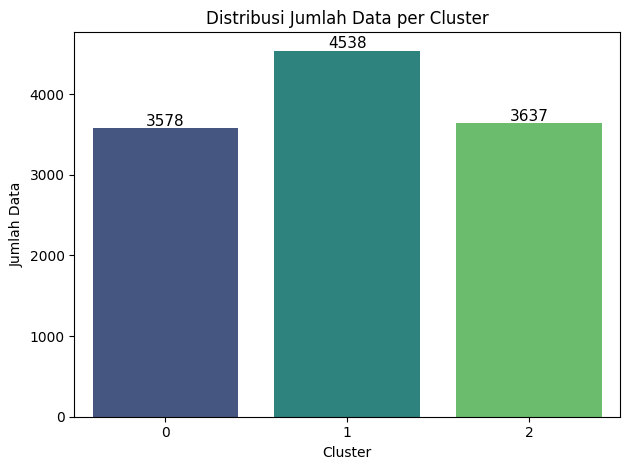

In [131]:
ax = sns.countplot(x='cluster', data=umkm_final, palette="viridis")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
plt.title('Distribusi Jumlah Data per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.tight_layout()
plt.show()

## **Evaluation**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


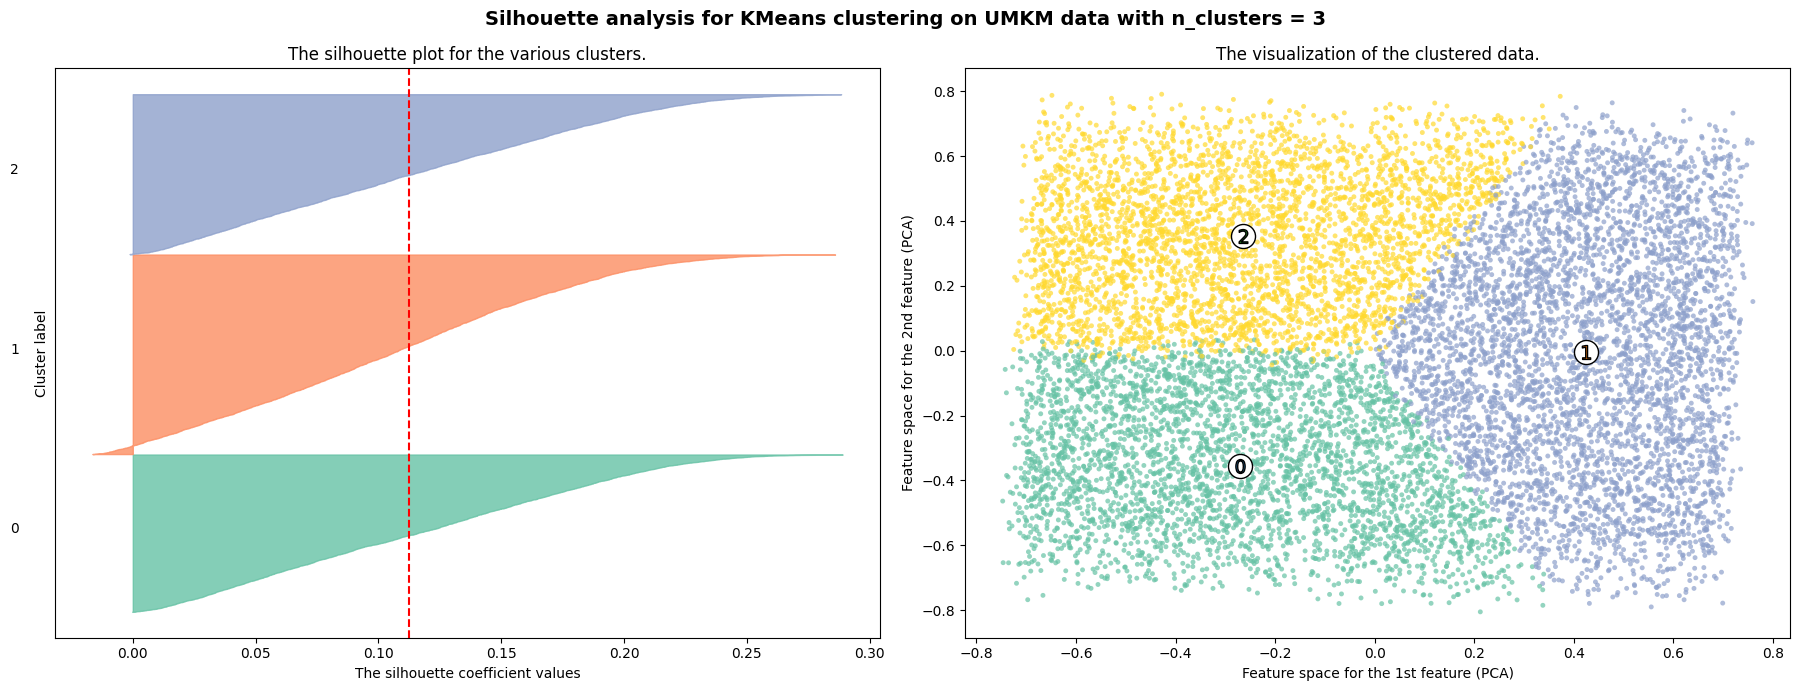

In [132]:
n_clusters = 3
cluster_labels = umkm_final["cluster"].values

# Silhouette score per sample
silhouette_vals = silhouette_samples(X, cluster_labels)
silhouette_avg = silhouette_score(X, cluster_labels)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,7))

# Silhouette Plot
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.Set2(i)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.8)
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_yticks([])

# Scatter plot of clusters (PCA 2D)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)
colors = plt.cm.Set2(cluster_labels.astype(float)/n_clusters)
ax2.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=50, lw=0, alpha=0.7, c=colors)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit(X)
centers_2d = pca.transform(kmeans.cluster_centers_)
for i, c in enumerate(centers_2d):
    ax2.scatter(c[0], c[1], marker='o', c='white', alpha=1, s=300, edgecolor='k')
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=100, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature (PCA)")
ax2.set_ylabel("Feature space for the 2nd feature (PCA)")

plt.suptitle(f"Silhouette analysis for KMeans clustering on UMKM data with n_clusters = {n_clusters}",
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


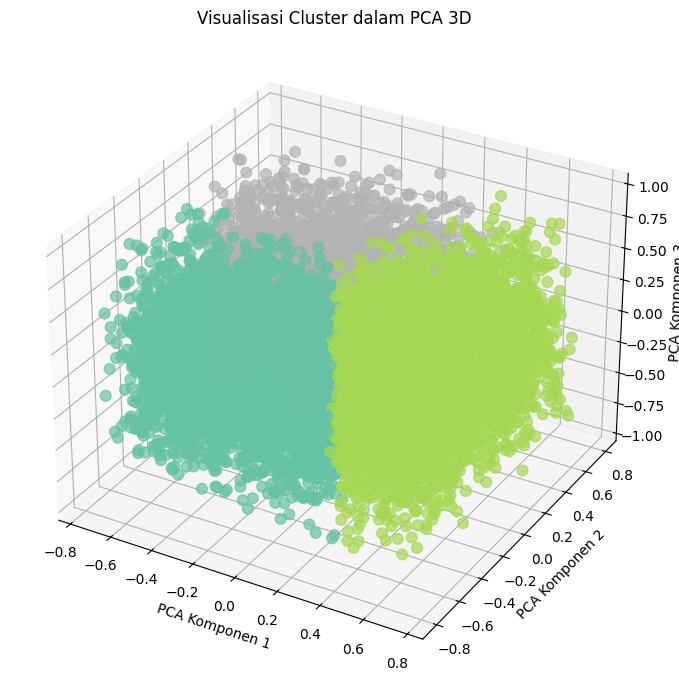

In [133]:
n_clusters = len(np.unique(cluster_labels))

# PCA ke 3 komponen
pca_3d = PCA(n_components=3, random_state=42)
X_pca3 = pca_3d.fit_transform(X)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.Set2(cluster_labels.astype(float) / n_clusters)
scatter = ax.scatter(
    X_pca3[:, 0], X_pca3[:, 1], X_pca3[:, 2],
    c=cluster_labels, cmap='Set2', s=60, alpha=0.7
)

# Plot centroid KMeans pada ruang PCA 3D
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit(X)
centers_3d = pca_3d.transform(kmeans.cluster_centers_)
for i, c in enumerate(centers_3d):
    ax.scatter(c[0], c[1], c[2], marker='o', c='white', s=300, edgecolor='k')
    ax.text(c[0], c[1], c[2], str(i), fontsize=16, weight='bold', color='k')

ax.set_title("Visualisasi Cluster dalam PCA 3D")
ax.set_xlabel('PCA Komponen 1')
ax.set_ylabel('PCA Komponen 2')
ax.set_zlabel('PCA Komponen 3')
plt.tight_layout()
plt.show()

### Interpretasi Hasil Cluster (Profil & Rekomendasi)

In [134]:
# Profil tiap cluster (statistik deskriptif)
cluster_profiles = umkm_final.groupby('cluster')[fitur_clustering].agg(['mean', 'median', 'min', 'max', 'count'])
display(cluster_profiles)

# Komposisi kategori tiap cluster
for cat in ['jenis_usaha', 'marketplace', 'status_legalitas']:
    print(f'\nDistribusi {cat} per cluster:')
    display(pd.crosstab(umkm_final['cluster'], umkm_final[cat], normalize='index').style.format("{:.2%}"))

# Rekomendasi berbasis profil cluster
for cl in sorted(umkm_final['cluster'].unique()):
    cluster_data = umkm_final[umkm_final['cluster'] == cl]
    print(f"\nCluster {cl}:")
    print(f"Jumlah UMKM: {len(cluster_data)}")
    print(f"Rata-rata aset: {cluster_data['aset'].mean():.2f}")
    print(f"Rata-rata omset: {cluster_data['omset'].mean():.2f}")
    print(f"Dominan jenis usaha: {cluster_data['jenis_usaha'].mode()[0]}")
    print(f"Dominan marketplace: {cluster_data['marketplace'].mode()[0]}")
    print(f"Status legalitas dominan: {cluster_data['status_legalitas'].mode()[0]}")

    if cluster_data['aset'].mean() < 0.3:
        print("Rekomendasi: Prioritaskan bantuan modal & pelatihan manajemen keuangan.")
    elif cluster_data['omset'].mean() > 0.7:
        print("Rekomendasi: Fasilitasi akses pasar ekspor atau scale-up.")


tenaga_kerja_perempuan                            \
                          mean    median  min  max count   
cluster                                                    
0                     0.490695  0.489899  0.0  1.0  3578   
1                     0.498115  0.494949  0.0  1.0  4538   
2                     0.516460  0.535354  0.0  1.0  3637   

        tenaga_kerja_laki_laki                            ... jenis_usaha  \
                          mean    median  min  max count  ...        mean   
cluster                                                   ...               
0                     0.492406  0.484848  0.0  1.0  3578  ...    0.499767   
1                     0.496354  0.494949  0.0  1.0  4538  ...    0.501800   
2                     0.500276  0.494949  0.0  1.0  3637  ...    0.498350   

                                  marketplace                         
           median  min  max count        mean median  min  max count  
cluster                                                               
0        0.333333  0.0  1.0  3578    0.505031    0.5  0.0  1.0  3578  
1        0.666667  0.0  1.0  4538    0.518235    0.5  0.0  1.0  4538  
2        0.333333  0.0  1.0  3637    0.475804    0.5  0.0  1.0  3637  

[3 rows x 55 columns]


Distribusi jenis_usaha per cluster:


jenis_usaha,0.000000,0.166667,0.333333,0.500000,0.666667,0.833333,1.000000
cluster,,,,,,,
0,0.17%,25.10%,24.85%,0.17%,24.23%,25.29%,0.20%
1,0.22%,25.54%,23.80%,0.26%,24.00%,25.91%,0.26%
2,0.19%,25.65%,24.42%,0.27%,24.03%,25.02%,0.41%



Distribusi marketplace per cluster:


marketplace,0.000000,0.250000,0.500000,0.750000,1.000000
cluster,,,,,
0,19.14%,20.51%,19.93%,20.01%,20.40%
1,18.51%,19.74%,19.68%,20.07%,21.99%
2,22.85%,20.37%,19.49%,18.17%,19.11%



Distribusi status_legalitas per cluster:


status_legalitas,0,1
cluster,,
0,47.82%,52.18%
1,48.17%,51.83%
2,49.93%,50.07%



Cluster 0:
Jumlah UMKM: 3578
Rata-rata aset: 0.53
Rata-rata omset: 0.23
Dominan jenis usaha: 0.8333333333333333
Dominan marketplace: 0.25
Status legalitas dominan: 1

Cluster 1:
Jumlah UMKM: 4538
Rata-rata aset: 0.50
Rata-rata omset: 0.51
Dominan jenis usaha: 0.8333333333333333
Dominan marketplace: 1.0
Status legalitas dominan: 1

Cluster 2:
Jumlah UMKM: 3637
Rata-rata aset: 0.46
Rata-rata omset: 0.76
Dominan jenis usaha: 0.16666666666666666
Dominan marketplace: 0.0
Status legalitas dominan: 1
Rekomendasi: Fasilitasi akses pasar ekspor atau scale-up.


### Validasi K yang Lebih Komprehensif

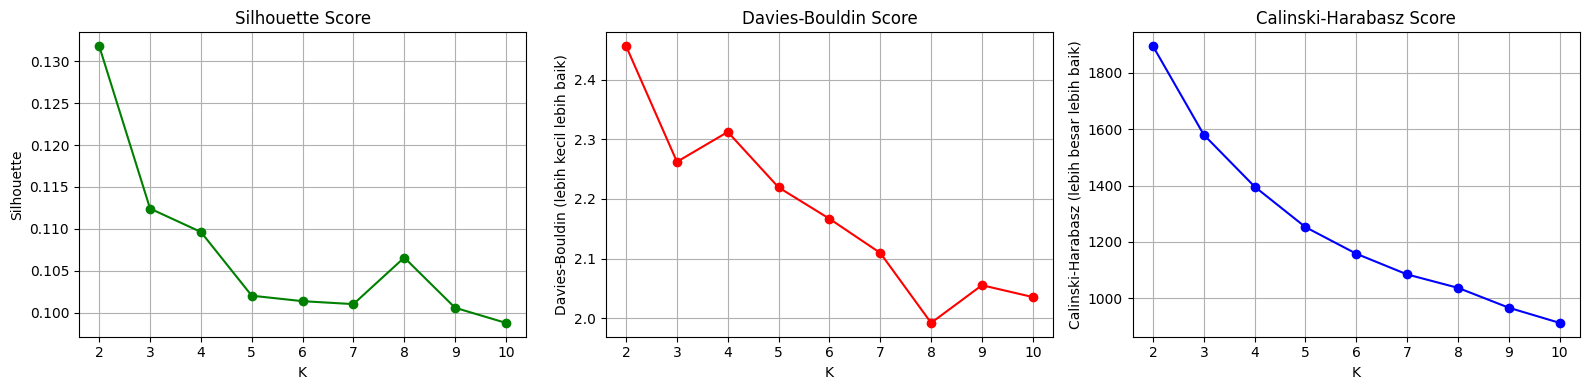

In [135]:
silhouette_scores = []
davies_bouldin_scores = []
calinski_scores = []

K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))
    davies_bouldin_scores.append(davies_bouldin_score(X, labels))
    calinski_scores.append(calinski_harabasz_score(X, labels))

plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.plot(K_range, silhouette_scores, 'go-')
plt.xlabel('K'); plt.ylabel('Silhouette')
plt.title('Silhouette Score')
plt.grid(True)
plt.subplot(1,3,2)
plt.plot(K_range, davies_bouldin_scores, 'ro-')
plt.xlabel('K'); plt.ylabel('Davies-Bouldin (lebih kecil lebih baik)')
plt.title('Davies-Bouldin Score')
plt.grid(True)
plt.subplot(1,3,3)
plt.plot(K_range, calinski_scores, 'bo-')
plt.xlabel('K'); plt.ylabel('Calinski-Harabasz (lebih besar lebih baik)')
plt.title('Calinski-Harabasz Score')
plt.grid(True)
plt.tight_layout()
plt.show()

Penjelasan:

*   Silhouette score: Semakin tinggi, semakin baik.
*   Davies-Bouldin Score: Semakin rendah, semakin baik.
*   Calinski-Harabasz Score: Semakin tinggi, semakin baik.



### Visualisasi Insight Bisnis

Heatmap rata-rata fitur per cluster

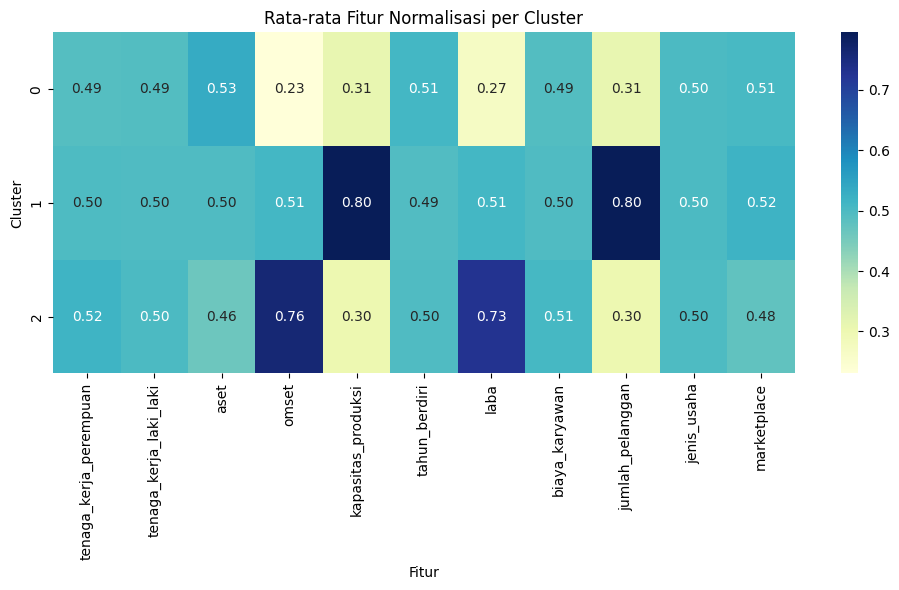

In [136]:
cluster_means = umkm_final.groupby('cluster')[fitur_clustering].mean()
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Rata-rata Fitur Normalisasi per Cluster")
plt.xlabel("Fitur")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

Pairplot untuk fitur penting

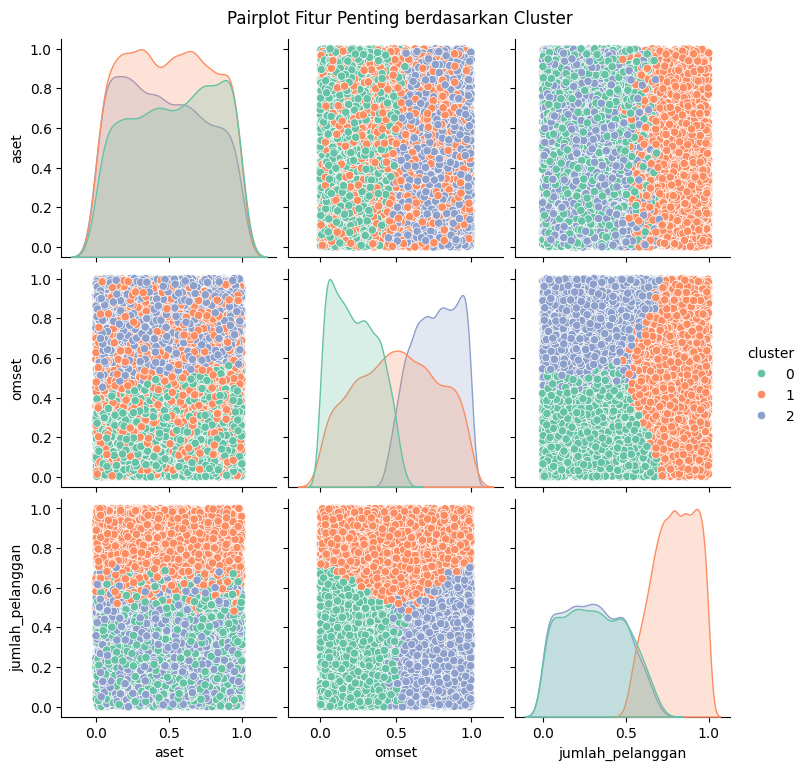

In [137]:
sns.pairplot(umkm_final, vars=['aset', 'omset', 'jumlah_pelanggan'], hue='cluster', palette='Set2')
plt.suptitle("Pairplot Fitur Penting berdasarkan Cluster", y=1.02)
plt.show()

## **Business Recomendation**

Untuk mengoptimalkan pertumbuhan dan keberlanjutan UMKM berdasarkan hasil segmentasi cluster, pelaku usaha dapat menerapkan strategi pengembangan yang disesuaikan dengan karakteristik utama tiap kelompok. Misalnya, pada cluster UMKM yang didominasi oleh usaha dengan aset relatif besar namun omset kecil dan mayoritas bergerak di bidang fashion, pelatihan pemasaran digital serta inovasi produk dapat difokuskan agar potensi aset dapat diubah menjadi peningkatan penjualan. Sementara itu, untuk cluster dengan aset kecil tetapi omset tinggi yang sebagian besar belum memiliki legalitas usaha, prioritas dapat diberikan pada pendampingan proses legalisasi dan akses pembiayaan guna memperkuat fondasi bisnis.

Selain itu, UMKM yang tergolong baru dan memiliki tenaga kerja sedikit dapat diarahkan untuk mengikuti program efisiensi operasional dan pengembangan kapasitas SDM. Dengan pendekatan berbasis profil ini, setiap UMKM dapat memperoleh rekomendasi yang relevan dan aplikatif sesuai kebutuhan utama mereka, sehingga peluang pertumbuhan bisnis dan daya saing di pasar dapat semakin meningkat.